In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# import data
data = pd.read_csv("cleaned_data.csv")
data.head()

C:\Users\gian\AppData\Local\Temp\ipykernel_43192\2796108112.py:7: DtypeWarning: Columns (22,36,37,46,47,48,49,50,51,52,53,54,56,112,113,118) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("cleaned_data.csv")


,Reporting Railroad Name,Report Year,Accident Number,Accident Year,Accident Month,Other Railroad Name,Other Accident Number,Other Accident Year,Other Accident Month,Maintenance Railroad Name,...,Other Railroad Company Grouping,Other Railroad Class,Other Railroad SMT Grouping,Other Parent Railroad Company Name,Other Railroad Holding Company,Maintenance Railroad Company Grouping,Maintenance Railroad Class,Maintenance Railroad SMT Grouping,Maintenance Parent Railroad Company Name,Maintenance Railroad Holding Company
0,Norfolk Southern Railway Company,2016.0,120068,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company
1,Norfolk Southern Railway Company,2016.0,120068,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company
2,Conrail,1981.0,0420001,81.0,4.0,NaN,NaN,NaN,NaN,Conrail,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 3,NaN,Consolidated Rail Corporation,Not Assigned
3,Norfolk Southern Railway Company,2016.0,120161,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company
4,Norfolk Southern Railway Company,2016.0,120161,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company


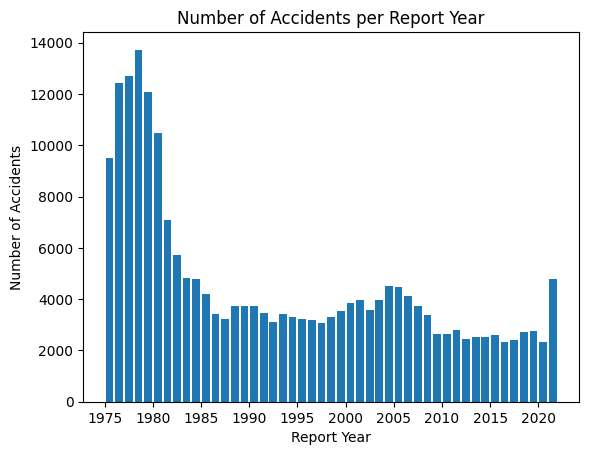

In [10]:
# data['year'] = data['year'].apply(lambda x: 1900 + x if x < 100 else 2000 + x)

# histogram of amount of accidents per Report Year
# with bins = amount of years
# add space between each bin
min_year = int(data['Report Year'].min())
max_year = int(data['Report Year'].max())
plt.hist(data['Report Year'], bins=range(min_year, max_year + 1), rwidth=0.8)
plt.xlabel('Report Year')
plt.xticks(range(min_year, max_year + 1, 5))
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.show()

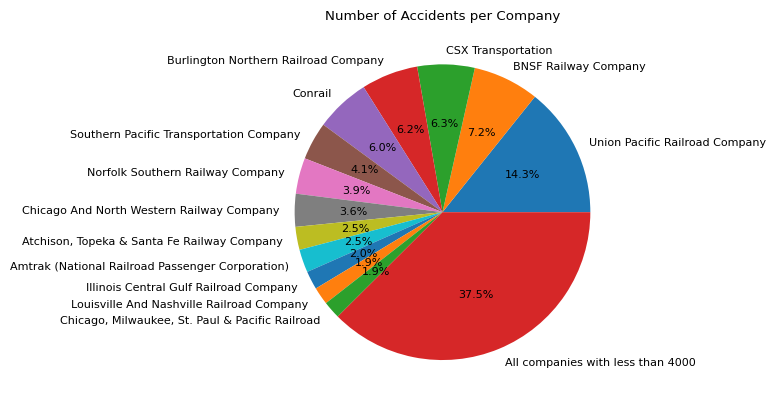

In [30]:
# Pie plot showing number of accidents per company
# Group all companies with less than 500 accidents into "Other"
companies = data['Reporting Railroad Name'].value_counts()
companies['All companies with less than 4000'] = companies[companies < 4000].sum()
companies = companies[companies > 4000]
# make text smaller
matplotlib.rcParams.update({'font.size': 8})
plt.pie(companies, labels=companies.index, autopct='%1.1f%%')
plt.title('Number of Accidents per Company')
plt.show()

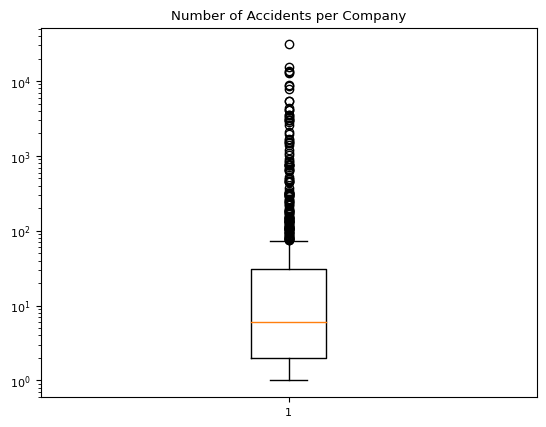

In [36]:
# box and whisker plot of accidents per company
# make  alpha = 0.5
companies = data['Reporting Railroad Name'].value_counts()
plt.boxplot(companies)
plt.title('Number of Accidents per Company')
# log scale
plt.yscale('log')
plt.show()